# 🕹️**TITLE : Gaming Data Analytics**

# 📘Introduction

The Gaming Data Analytics project focuses on analyzing player and gameplay data to uncover useful insights.
It helps understand player engagement, performance metrics, and behavioral patterns.
Using analytics, developers can identify key success factors and problem areas.
The project uses data visualization and statistical tools to interpret large datasets.
GDA demonstrates how analytics can drive smarter decisions in game development.

 # 📌Importance of the Project

GDA helps improve player experience through data-driven strategies.
It allows game studios to optimize gameplay, reduce churn, and increase engagement.
Insights from data can guide better marketing and monetization techniques.
Understanding player preferences leads to more balanced and fun game design.
Hence, Gaming Data Analytics plays a crucial role in modern game success.

# Data Import and Library Setup

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset Loading

In [3]:
data = pd.read_csv("Gaming_Analytics_Dataset.csv")
data

,player_id,age,gender,country,signup_date,last_login,session_count,avg_session_length,total_play_hours,purchase_count,...,days_active_week,friends_count,guild_participation,multiplayer_sessions,achievements_unlocked,rage_quits,chat_sentiment,churn_risk,next_purchase_days,player_segment
0,1,41,Male,Antigua and Barbuda,03-08-2025,30-08-2025,1226,149.19,869.37,13,...,5,94,True,21,146,28,-0.61,0.11,24,Competitive
1,2,27,Male,Lithuania,13-06-2024,20-09-2025,1047,52.93,2561.77,25,...,6,95,True,205,66,33,-0.58,0.78,40,Competitive
2,3,20,Female,Dominica,16-10-2024,07-09-2025,1451,10.18,50.98,37,...,2,90,False,126,135,17,-0.92,0.81,54,Casual
3,4,33,Other,Oman,23-03-2025,18-09-2025,637,37.02,102.18,22,...,5,29,NaN,335,7,6,-0.36,0.77,33,Regular
4,5,31,Other,Morocco,12-03-2025,26-09-2025,1672,89.65,1827.53,21,...,4,1,False,444,121,28,0.12,0.11,8,Competitive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,17,Other,Nauru,17-12-2022,08-09-2025,956,142.04,1267.65,29,...,3,92,False,395,33,22,-0.07,0.25,44,Regular
496,497,41,Male,Czech Republic,11-11-2024,14-09-2025,1106,30.75,2416.95,46,...,2,68,False,110,189,36,-0.73,0.80,40,Elite
497,498,49,Female,Samoa,16-08-2025,23-09-2025,1719,111.03,1463.26,34,...,3,61,True,293,78,8,0.86,0.82,45,Casual
498,499,31,Male,Gambia,26-08-2025,13-09-2025,928,169.20,103.10,18,...,3,51,False,76,77,14,0.74,0.98,19,Casual


# 🛠️ Functions 

↪ Preview

In [4]:
data.head(3)

,player_id,age,gender,country,signup_date,last_login,session_count,avg_session_length,total_play_hours,purchase_count,...,days_active_week,friends_count,guild_participation,multiplayer_sessions,achievements_unlocked,rage_quits,chat_sentiment,churn_risk,next_purchase_days,player_segment
0,1,41,Male,Antigua and Barbuda,03-08-2025,30-08-2025,1226,149.19,869.37,13,...,5,94,True,21,146,28,-0.61,0.11,24,Competitive
1,2,27,Male,Lithuania,13-06-2024,20-09-2025,1047,52.93,2561.77,25,...,6,95,True,205,66,33,-0.58,0.78,40,Competitive
2,3,20,Female,Dominica,16-10-2024,07-09-2025,1451,10.18,50.98,37,...,2,90,False,126,135,17,-0.92,0.81,54,Casual


↪ Last Rows

In [5]:
data.tail(3)

,player_id,age,gender,country,signup_date,last_login,session_count,avg_session_length,total_play_hours,purchase_count,...,days_active_week,friends_count,guild_participation,multiplayer_sessions,achievements_unlocked,rage_quits,chat_sentiment,churn_risk,next_purchase_days,player_segment
497,498,49,Female,Samoa,16-08-2025,23-09-2025,1719,111.03,1463.26,34,...,3,61,True,293,78,8,0.86,0.82,45,Casual
498,499,31,Male,Gambia,26-08-2025,13-09-2025,928,169.20,103.10,18,...,3,51,False,76,77,14,0.74,0.98,19,Casual
499,500,20,Female,Morocco,23-11-2022,09-09-2025,128,158.94,1293.26,49,...,2,88,False,348,120,2,0.42,0.50,32,Regular


↪ Shape of dataset

In [6]:
data.shape

(500, 21)

↪ Statistical Analysis

In [7]:
data.describe()

,player_id,age,session_count,avg_session_length,total_play_hours,purchase_count,total_spent,days_active_week,friends_count,multiplayer_sessions,achievements_unlocked,rage_quits,chat_sentiment,churn_risk,next_purchase_days
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,32.066000,1012.984000,95.485580,1481.243460,25.718000,250.8035,2.864000,50.878000,253.152000,100.812000,23.784000,-0.012300,0.504920,29.852000
std,144.481833,10.976092,555.440788,47.079766,862.688511,14.622247,146.1203,2.022297,28.829384,144.938716,57.295814,14.143175,0.569174,0.295275,16.086879
min,1.000000,13.000000,52.000000,10.180000,50.560000,0.000000,0.0100,0.000000,0.000000,0.000000,0.000000,0.000000,-0.990000,0.010000,1.000000
25%,125.750000,23.000000,525.250000,53.617500,714.882500,13.000000,132.7575,1.000000,26.000000,125.000000,53.000000,13.000000,-0.472500,0.240000,17.000000
50%,250.500000,33.500000,1024.500000,98.755000,1465.965000,26.000000,250.3050,3.000000,53.000000,252.500000,102.000000,23.000000,-0.045000,0.520000,29.000000
75%,375.250000,41.000000,1476.750000,134.347500,2252.057500,39.000000,379.7500,5.000000,76.000000,383.000000,150.000000,36.000000,0.452500,0.760000,43.250000
max,500.000000,49.000000,1995.000000,179.230000,2991.380000,49.000000,497.4100,6.000000,99.000000,499.000000,199.000000,49.000000,1.000000,1.000000,59.000000


↪ DataType

In [8]:
data.dtypes

player_id                  int64
age                        int64
gender                    object
country                   object
signup_date               object
last_login                object
session_count              int64
avg_session_length       float64
total_play_hours         float64
purchase_count             int64
total_spent              float64
days_active_week           int64
friends_count              int64
guild_participation       object
multiplayer_sessions       int64
achievements_unlocked      int64
rage_quits                 int64
chat_sentiment           float64
churn_risk               float64
next_purchase_days         int64
player_segment            object
dtype: object

# Data Cleaning and Preprocessing

↪ To check null values

In [9]:
data.isnull().sum()

player_id                0
age                      0
gender                   0
country                  0
signup_date              0
last_login               0
session_count            0
avg_session_length       0
total_play_hours         0
purchase_count           0
total_spent              0
days_active_week         0
friends_count            0
guild_participation      1
multiplayer_sessions     0
achievements_unlocked    0
rage_quits               0
chat_sentiment           0
churn_risk               0
next_purchase_days       0
player_segment           0
dtype: int64

In [10]:
data['guild_participation'].fillna(data['guild_participation'].mode()[0],inplace=True)

In [39]:
data.isnull().sum()

player_id                0
age                      0
gender                   0
country                  0
signup_date              0
last_login               0
session_count            0
avg_session_length       0
total_play_hours         0
purchase_count           0
total_spent              0
days_active_week         0
friends_count            0
guild_participation      0
multiplayer_sessions     0
achievements_unlocked    0
rage_quits               0
chat_sentiment           0
churn_risk               0
next_purchase_days       0
player_segment           0
cluster                  0
made_purchase            0
dtype: int64

↪ Duplicated values

In [11]:
data.duplicated().sum()

np.int64(0)

↪ Columns Names 

In [12]:
data.columns

Index(['player_id', 'age', 'gender', 'country', 'signup_date', 'last_login',
       'session_count', 'avg_session_length', 'total_play_hours',
       'purchase_count', 'total_spent', 'days_active_week', 'friends_count',
       'guild_participation', 'multiplayer_sessions', 'achievements_unlocked',
       'rage_quits', 'chat_sentiment', 'churn_risk', 'next_purchase_days',
       'player_segment'],
      dtype='object')

↪ Outerlines

<Axes: >

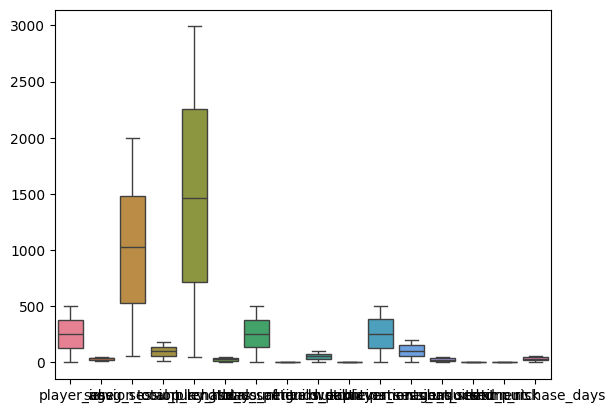

In [13]:
sns.boxplot(data)

↪ Features 

In [14]:
features = ['session_count', 'avg_session_length', 'total_play_hours',
            'purchase_count', 'days_active_week', 'friends_count',
            'multiplayer_sessions', 'achievements_unlocked', 'rage_quits']

In [15]:
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38389211,  1.1418537 , -0.70997381, ..., -1.60332938,
         0.78946877,  0.29839285],
       [ 0.06130278, -0.90480907,  1.25376503, ..., -0.33255589,
        -0.60819215,  0.65227431],
       [ 0.78938149, -1.81375187, -1.65957452, ..., -0.87815973,
         0.5972904 , -0.48014637],
       ...,
       [ 1.27236439,  0.33050266, -0.02086671, ...,  0.27520534,
        -0.39854301, -1.117133  ],
       [-0.15315604,  1.56730272, -1.59909823, ..., -1.22347861,
        -0.41601377, -0.69247525],
       [-1.59489604,  1.34915644, -0.21812244, ...,  0.6550561 ,
         0.33522897, -1.54179076]], shape=(500, 9))

# KMEANS CLUSTER

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

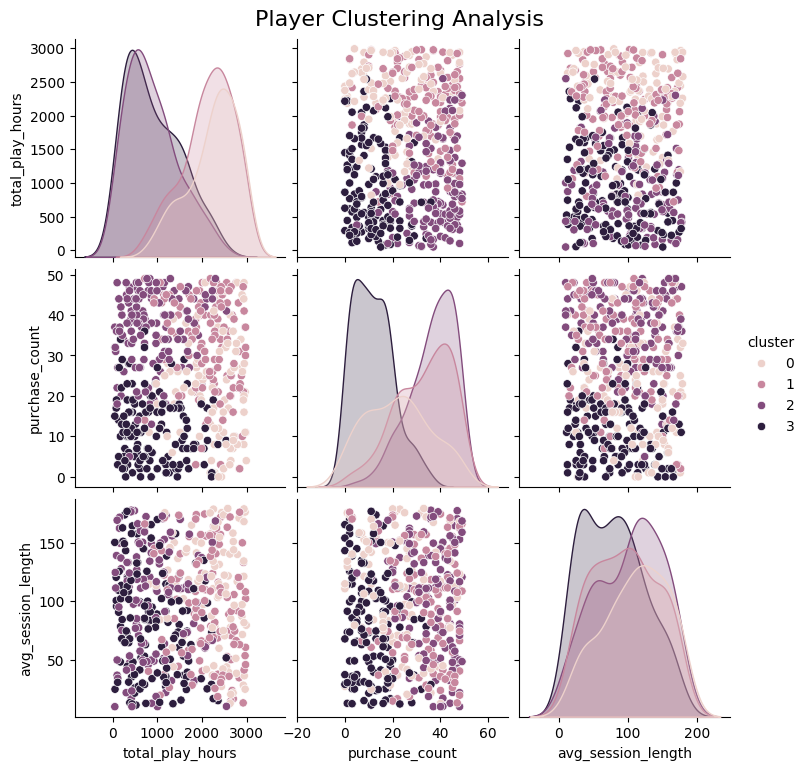

In [17]:
sns.pairplot(data, hue='cluster', vars=['total_play_hours', 'purchase_count', 'avg_session_length'])
plt.suptitle("Player Clustering Analysis", fontsize=16, y=1.02)
plt.show()


# Exploratory Data Analysis

↪ Count Plot

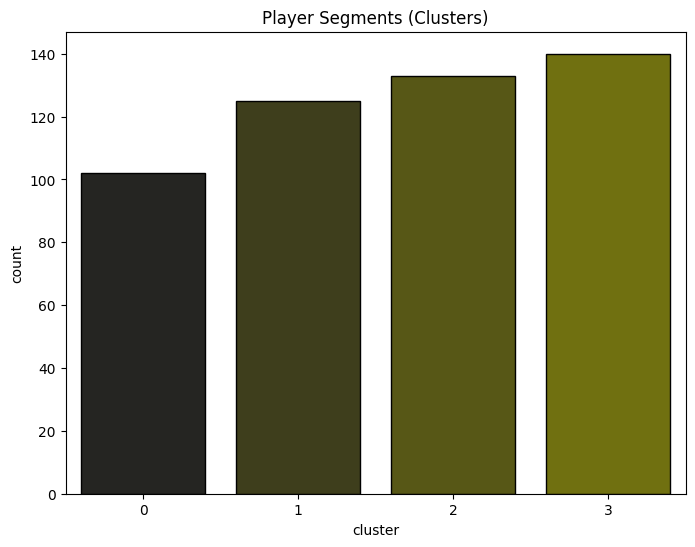

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=data,legend=True,edgecolor='black',palette='dark:olive')
plt.title("Player Segments (Clusters)")
plt.show()

↪ Box Plot

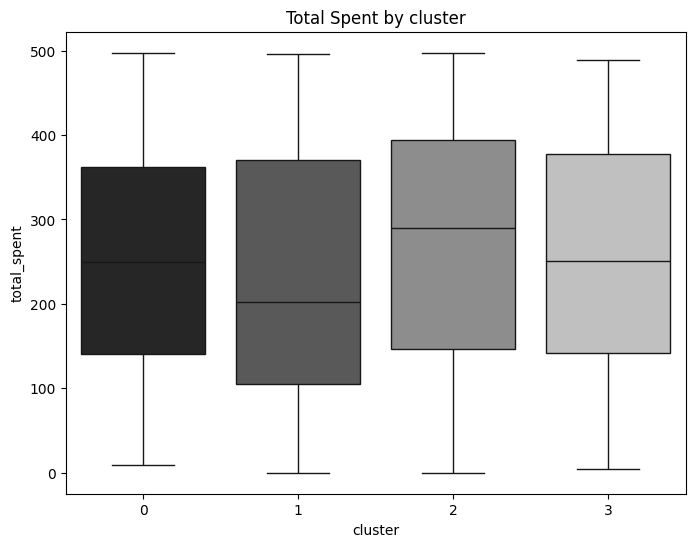

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='total_spent', data=data,palette='dark:silver')
plt.title("Total Spent by cluster")
plt.show()

↪ Bar Plot

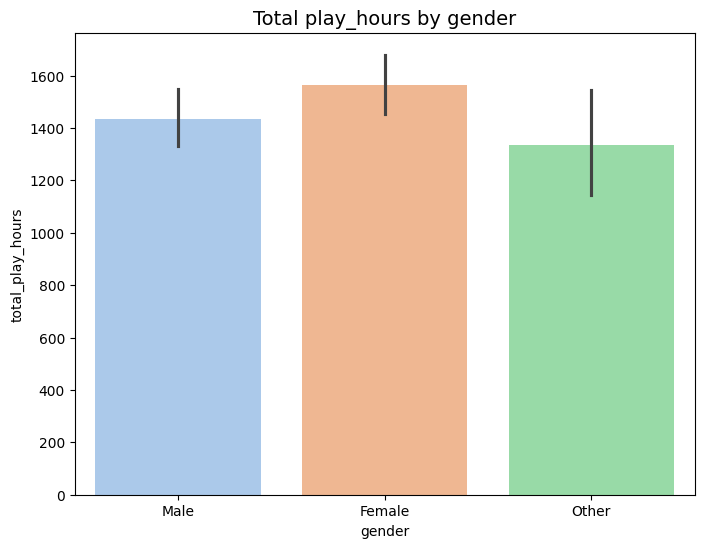

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='total_play_hours', data=data, palette='pastel')
plt.title("Total play_hours by gender", fontsize=14)
plt.show()

↪ Rename Column

In [21]:
data['made_purchase'] = data['purchase_count'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
X = data[features]
y = data['made_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOMFORESTCLASSIFIER

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Length of y_test: 100
Length of y_pred: 100


↪ Accuary Score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 1.0000


↪ Confusion Matrix

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[ 2  0]
 [ 0 98]]


↪ Classification Report

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        98

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# DECISIONTREECLASSIFIER

In [28]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
pd.crosstab(y_test, preds)

col_0,0,1
made_purchase,,
0,2,0
1,0,98


↪ Accuary Score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 1.0000


↪ Classification Report

In [32]:
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
np.mean(preds == y_test)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        98

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



np.float64(1.0)

# STANDARDSCALER

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTICREGRESSION

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred = log_reg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

↪ Accuary Score

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9800


↪ Classification Report

In [37]:
print("\n✅ Logistic Regression Accuracy Score:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Logistic Regression Accuracy Score: 0.98

Confusion Matrix:
 [[ 0  2]
 [ 0 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        98

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100



# SAVING THE MODEL

In [38]:
import pickle
with open('Gaming_model.pkl','wb') as file:
    pickle.dump(model,file)


# 🔮 Prediction Interface (Streamlit)

A Streamlit web app is developed to make the analysis interactive and user-friendly.
Users can input new player details such as total playtime, spending, and session count.
The app predicts which player segment they belong to using the trained model.
It also provides visual insights and plots for better understanding.

# 🧾Conclusion

The project effectively used data analytics to extract insights from gaming data.
It identified useful patterns in player activity, engagement, and performance.
Findings can help game developers make informed design and marketing choices.
GDA demonstrates how analytics can transform raw gameplay data into strategy.
This project bridges gaming and data science for innovation and efficiency.

# 💡Future Work

Future improvements can include integrating deep learning models for real-time analytics.
Adding player feedback and in-game metrics will enhance prediction accuracy.
Developing a dashboard can make data insights more interactive and visual.
Cloud-based data pipelines can help handle large-scale live gaming data.
Finally, improving data privacy measures ensures ethical and secure analytics.